In [1]:
# Importing all libraries required in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import probplot
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn import tree
from IPython.display import Image
from pydotplus import graph_from_dot_data
import graphviz

In [2]:
# Reading data, checking for null values and dropping duplicates
df = pd.read_csv("Iris.csv")
print("Data imported successfully!")
print("are there any null values? : {}".format(df.isnull().values.any()))
df.drop_duplicates(inplace=True)
print("Duplicates are dropped, if there were any of them.")

Data imported successfully!
are there any null values? : False
Duplicates are dropped, if there were any of them.


# Visualization

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:>

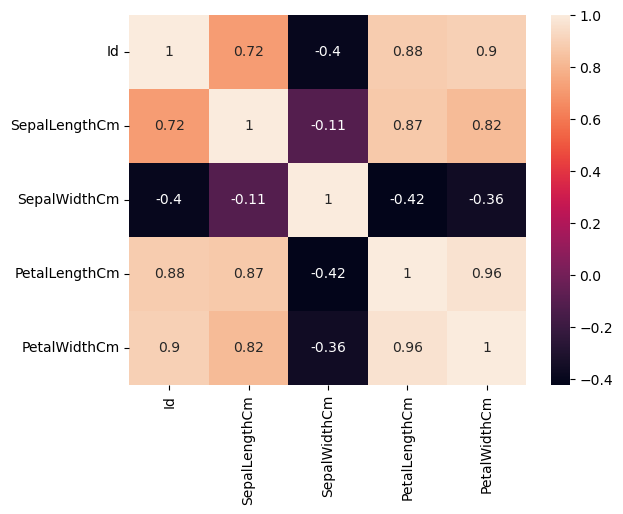

In [4]:
corr=df.corr()
sns.heatmap(corr,annot=True)

# Normality test
We will perform a test to check whether the data is normally distributed, we will use the Quantile-Quantile plot.

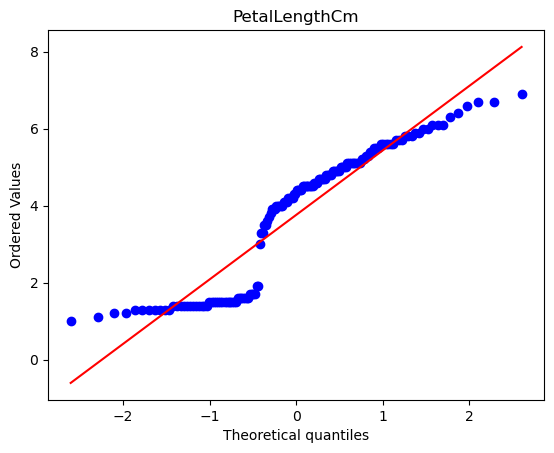

In [5]:
g = pd.DataFrame(df['PetalLengthCm']).copy()
for i in g.columns:
    probplot(x=g[i], dist='norm', plot=plt)
    plt.title(i)
    plt.show()

concluding from what we see from the graph, the dataset is not normally distributed.

we are going to use Min-Max feature scaling.

but first, we will drop the ID column because it is insignificant.

In [6]:
new_df2 = df.drop(['Id'], axis=1)
new_df2.head(101)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [7]:
X = new_df2.iloc[:, [0, 1, 2, 3]].values
y_test = new_df2["Species"]

In [8]:
scaler = MinMaxScaler().fit(X)
X_norm = scaler.transform(X)

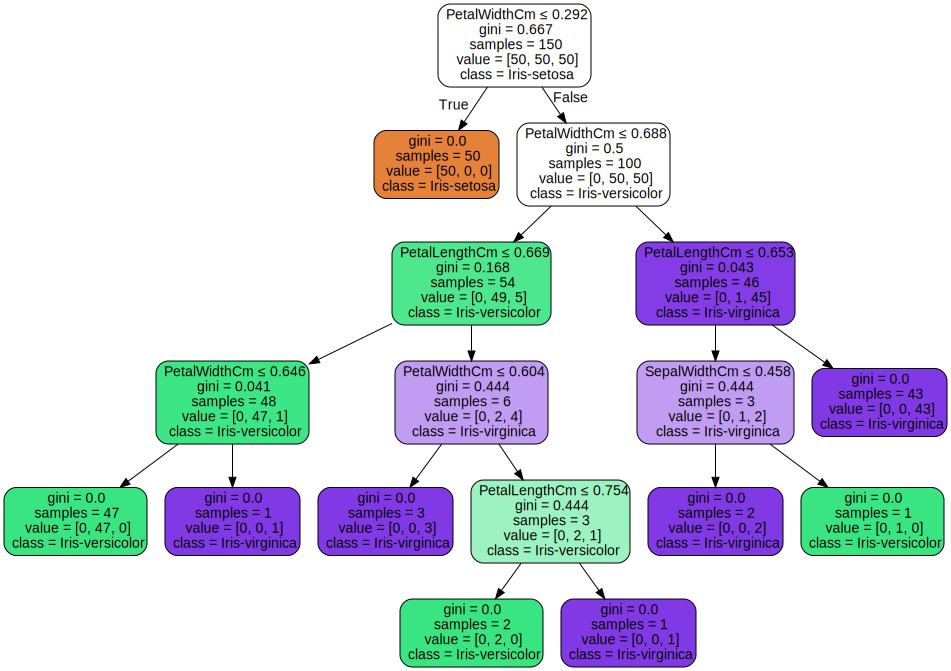

In [9]:
# Creating the Decision Tree classifier and applying it to the dataset
decision_tree = DecisionTreeClassifier().fit(X_norm, y_test)

# Visualising the Decision Tree
dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = new_df2.columns[:4],
                class_names = new_df2["Species"].unique(),
                rounded = True, filled = True, special_characters=True)
graph = graphviz.Source(dot_data, format="png") 
graph